In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv("Unemployment in India.csv")
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

In [3]:
df.columns=["state","date","frequency","estimated unemployment rate","estimated employed","estimated labour participation rate","region", "longitude", "latitude"]


In [4]:
df.head()


,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   state                                267 non-null    object 
 1   date                                 267 non-null    object 
 2   frequency                            267 non-null    object 
 3   estimated unemployment rate          267 non-null    float64
 4   estimated employed                   267 non-null    int64  
 5   estimated labour participation rate  267 non-null    float64
 6   region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
import calendar
import datetime as dt

In [7]:
#creating new month column from df['date']
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['month_int'] =  df['date'].dt.month
df['month'] =  df['month_int'].apply(lambda x: calendar.month_abbr[x])

In [8]:
df.head()


,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [9]:
round(df.describe())


,estimated unemployment rate,estimated employed,estimated labour participation rate,longitude,latitude,month_int
count,267.0,267.0,267.0,267.0,267.0,267.0
mean,12.0,13962106.0,42.0,23.0,81.0,6.0
std,11.0,13366318.0,8.0,6.0,6.0,3.0
min,0.0,117542.0,17.0,11.0,71.0,1.0
25%,5.0,2838930.0,37.0,18.0,76.0,3.0
50%,10.0,9732417.0,40.0,24.0,79.0,6.0
75%,17.0,21878686.0,44.0,27.0,85.0,8.0
max,76.0,59433759.0,70.0,34.0,93.0,10.0


Axes(0.125,0.11;0.775x0.77)


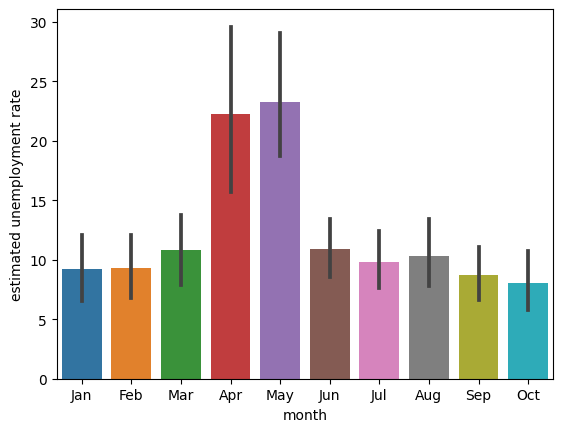

In [10]:
## estimate unemployement rates in different months
print(sns.barplot(x='month',y ="estimated unemployment rate",data = df))

<Axes: xlabel='month', ylabel='estimated labour participation rate'>

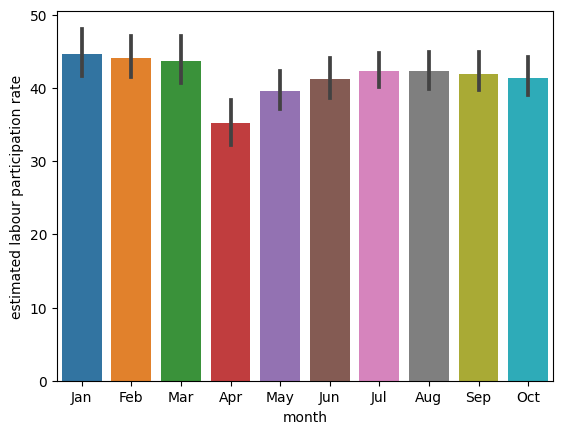

In [11]:
# estimate labour participation rates in different months
sns.barplot(x='month',y='estimated labour participation rate',data = df)

In [12]:
#State wise Analysis

state = df.groupby(["state"])[["estimated unemployment rate", "estimated employed",
                               "estimated labour participation rate"]].mean()

In [13]:
state = state.sort_values(by= "estimated unemployment rate",ascending=False)
state = pd.DataFrame(state).reset_index()
state.head()

,state,estimated unemployment rate,estimated employed,estimated labour participation rate
0,Haryana,27.477,6844059.0,42.100
1,Tripura,25.055,1397291.6,57.848
2,Jharkhand,19.539,8770642.4,40.356
3,Bihar,19.471,23606828.0,37.173
4,Delhi,18.414,4632821.9,35.857


In [14]:
fig = px.bar(state, x='state', y="estimated unemployment rate", color="state", title="Average unemploment Rate (State)")
fig.show()

<Axes: xlabel='month_int,month'>

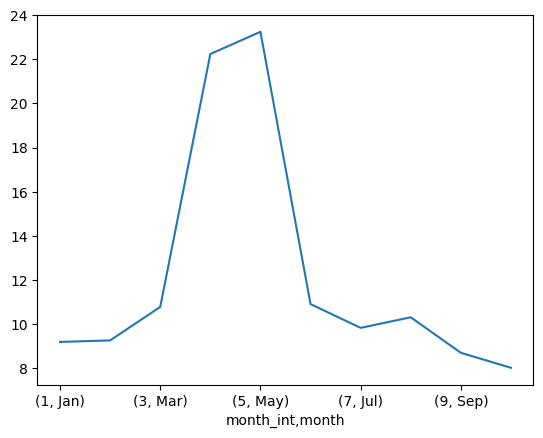

In [15]:
df.groupby(['month_int','month'])['estimated unemployment rate'].mean().plot()


In [16]:
fig = px.box(df,x='state',y='estimated unemployment rate',color='state',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [17]:
df.head(1)


,state,date,frequency,estimated unemployment rate,estimated employed,estimated labour participation rate,region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan


<Axes: title={'center': 'estimated unemployment rate in different states'}, xlabel='state', ylabel='month'>

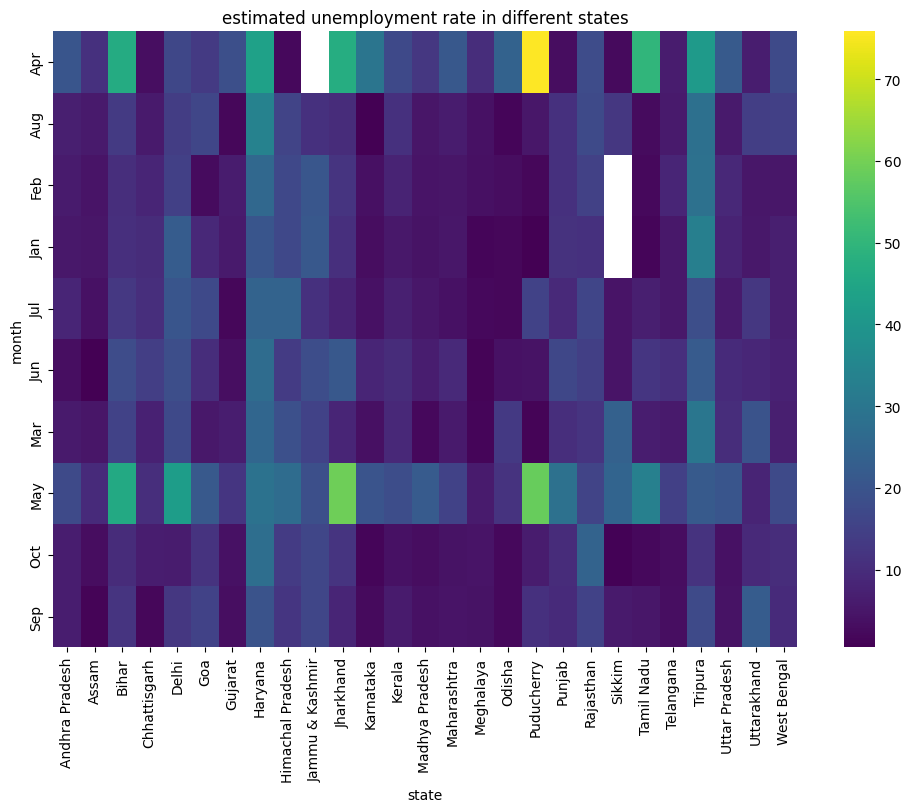

In [18]:
fig = plt.figure(figsize = (12,8))
plt.title('estimated unemployment rate in different states')
sns.heatmap(df.pivot_table(values='estimated unemployment rate',index='month',columns='state'),cmap='viridis')

In [19]:
df['estimated unemployment rate'].mean()


12.236928838951311

Text(0.5, 1.0, 'estimated unemployment rate in different states')

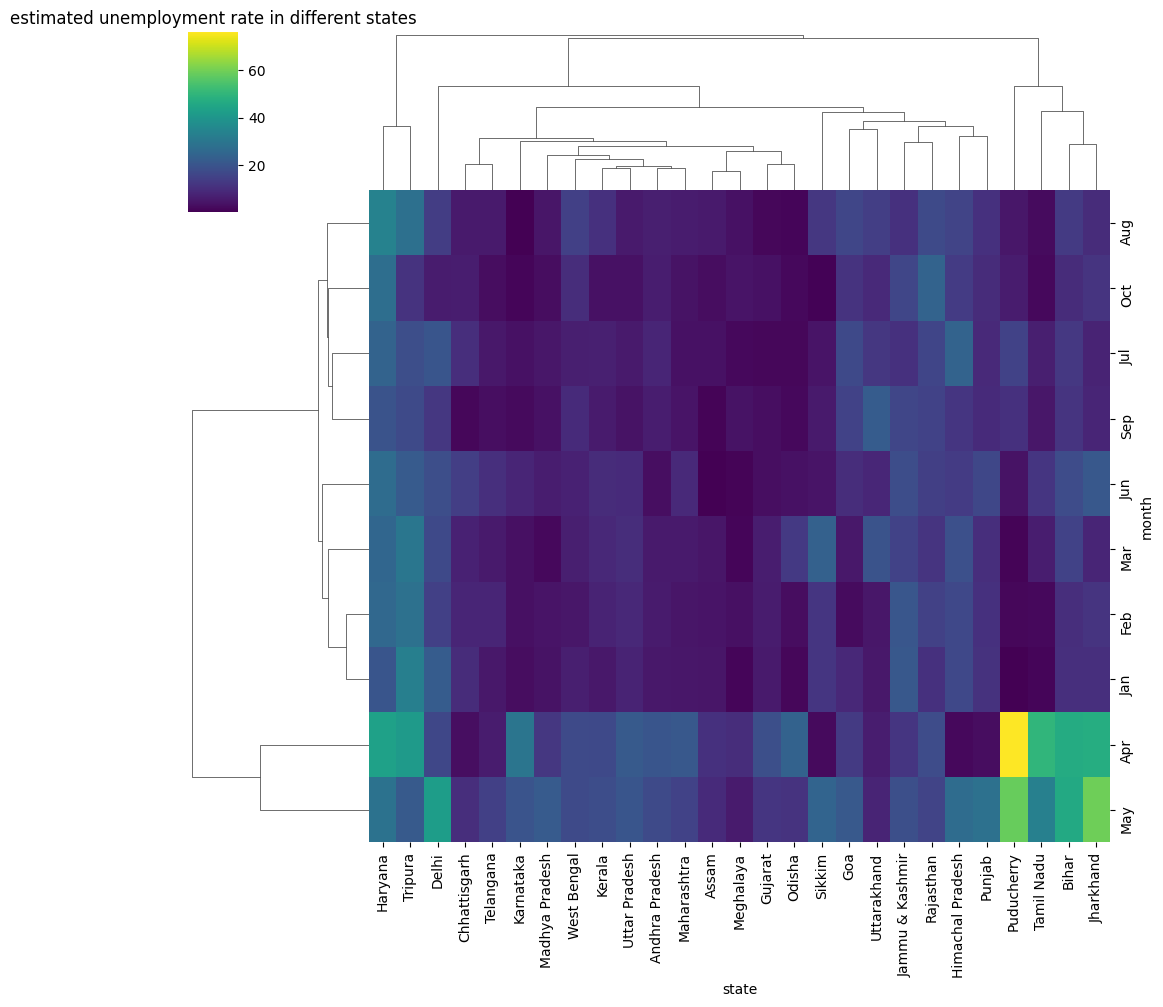

In [20]:
sns.clustermap(df.pivot_table(values='estimated unemployment rate',index='month',columns='state').fillna(12.23),cmap='viridis')
plt.title('estimated unemployment rate in different states')

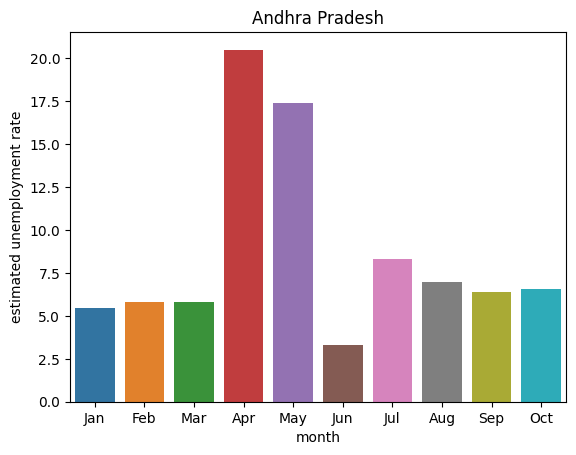

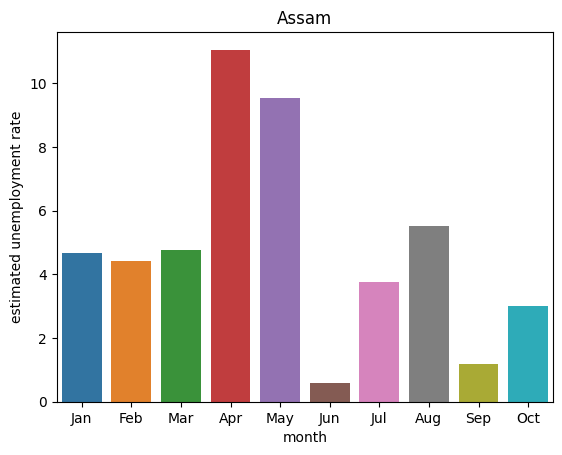

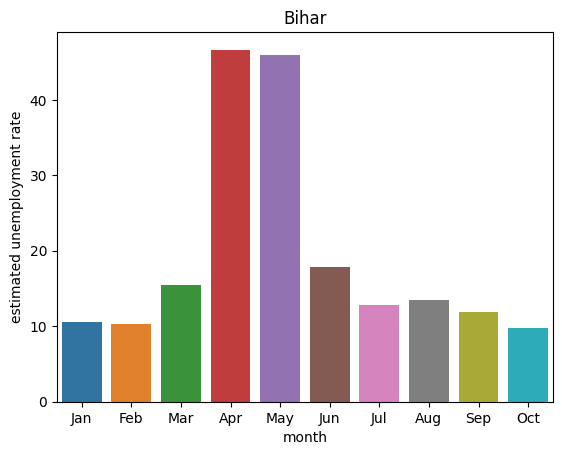

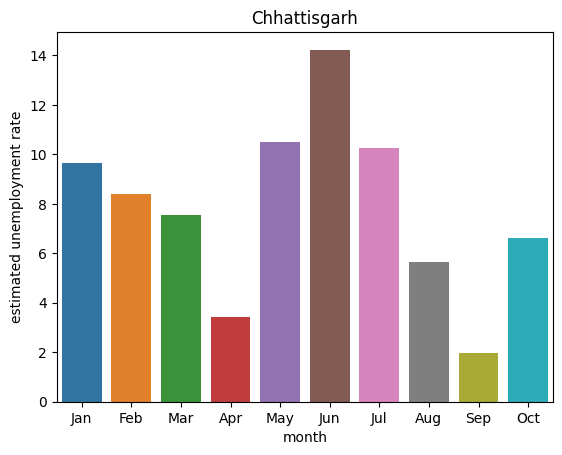

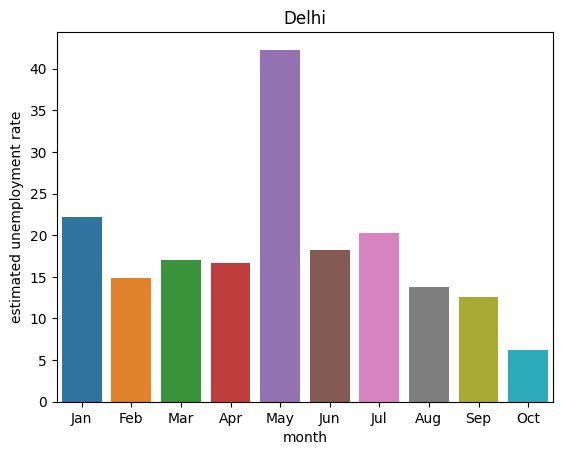

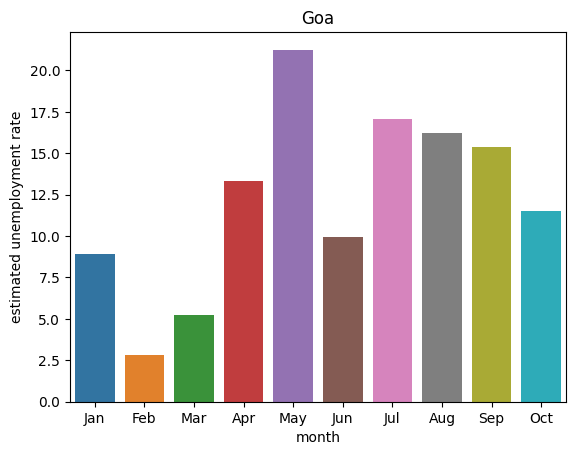

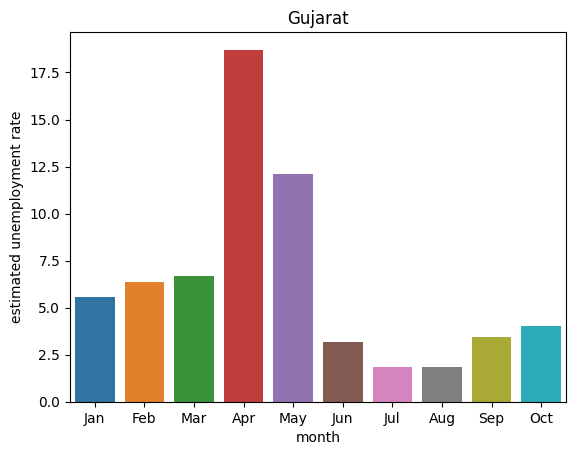

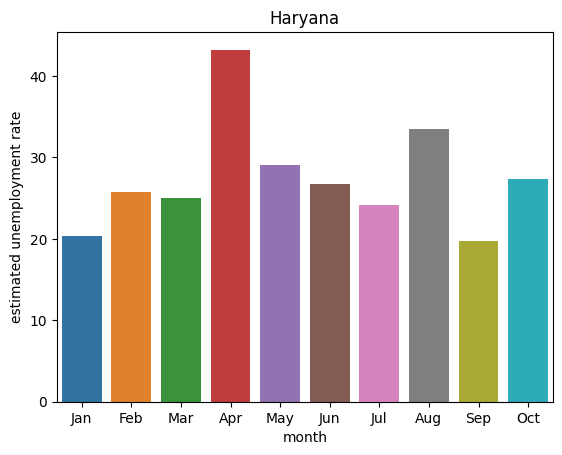

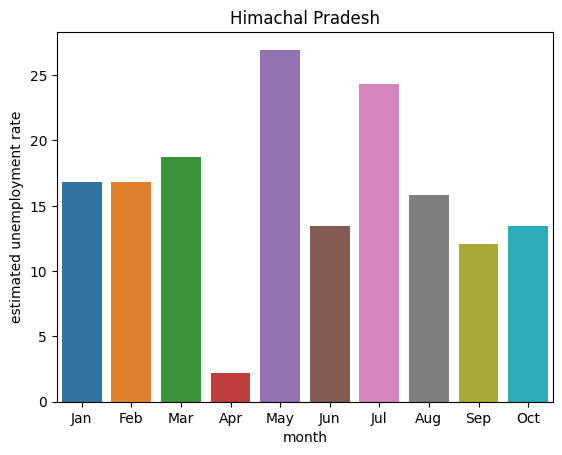

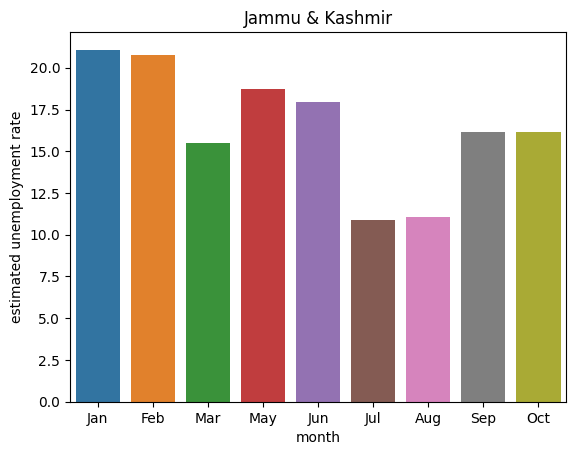

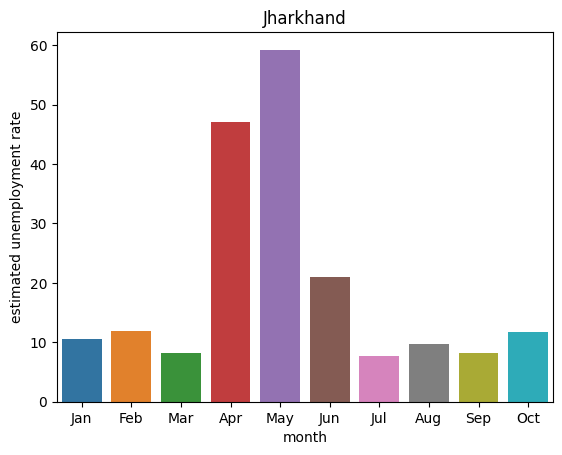

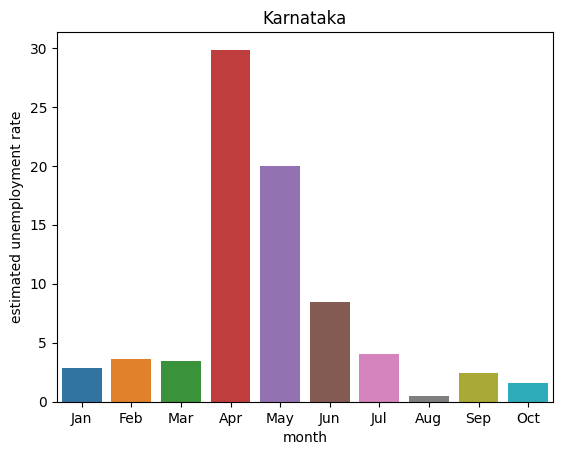

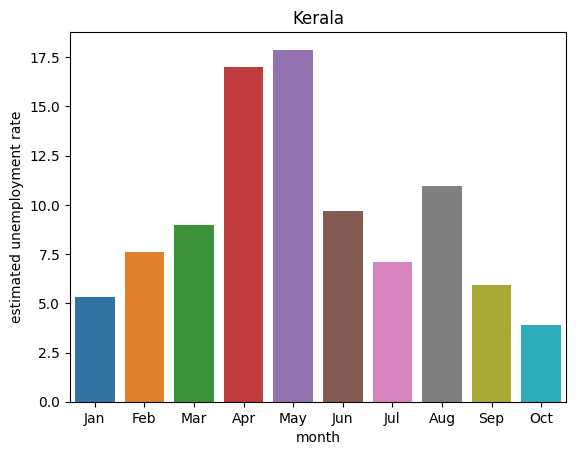

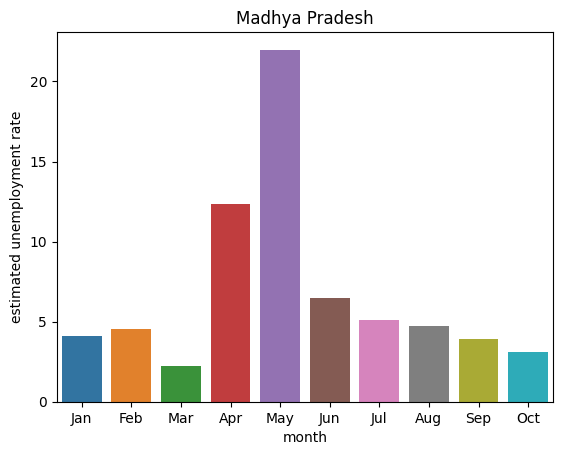

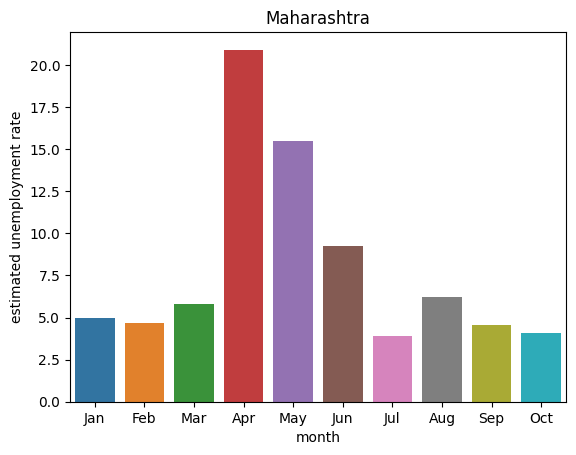

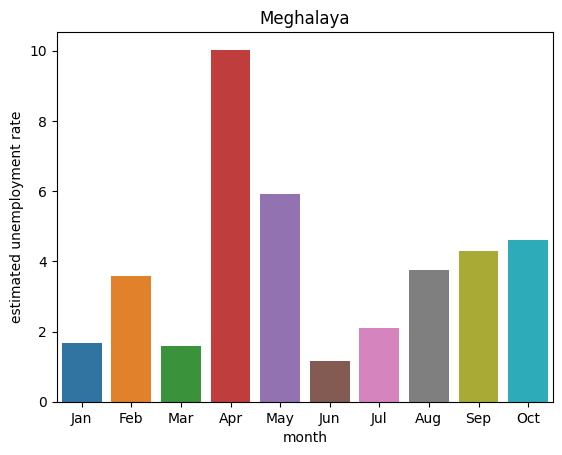

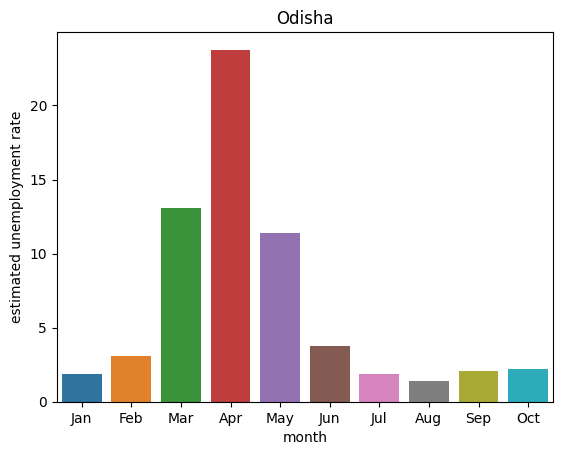

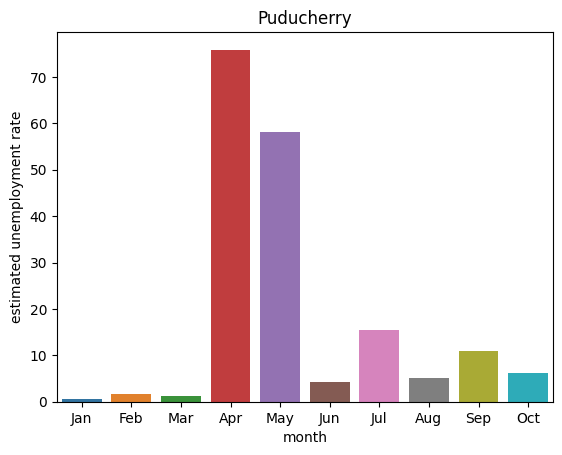

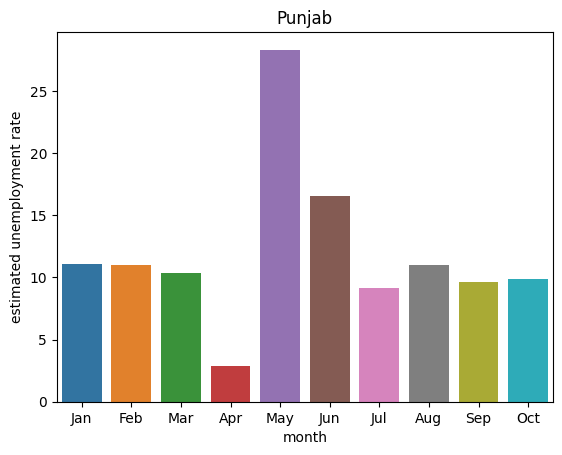

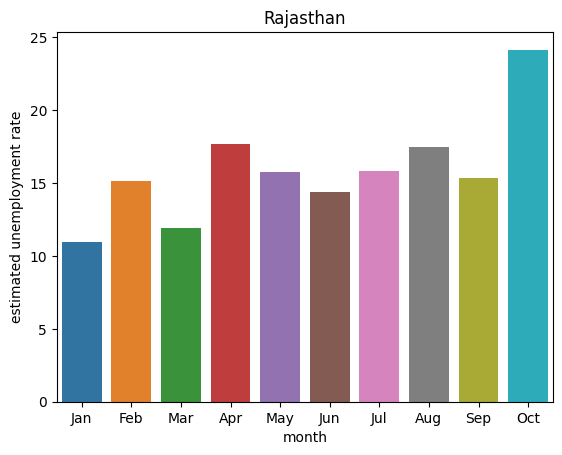

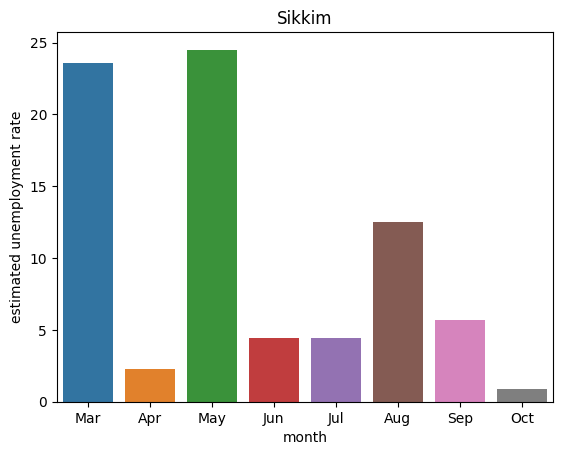

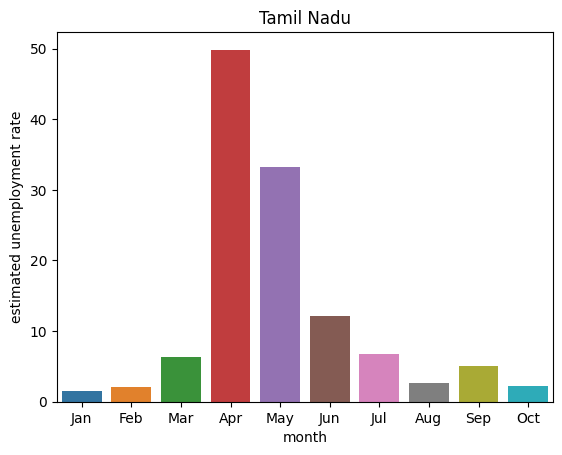

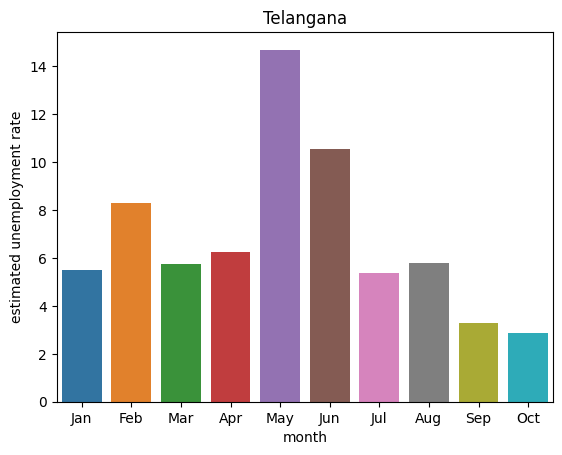

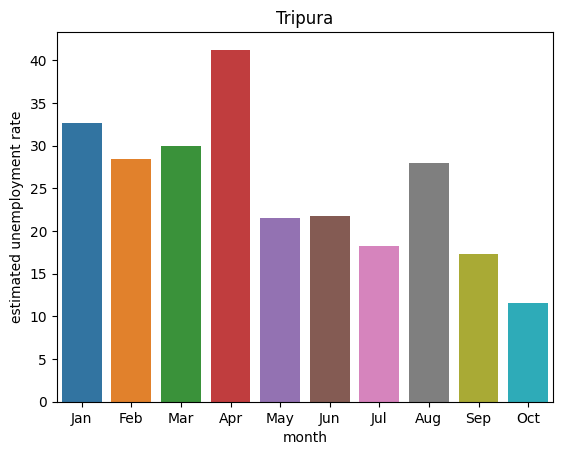

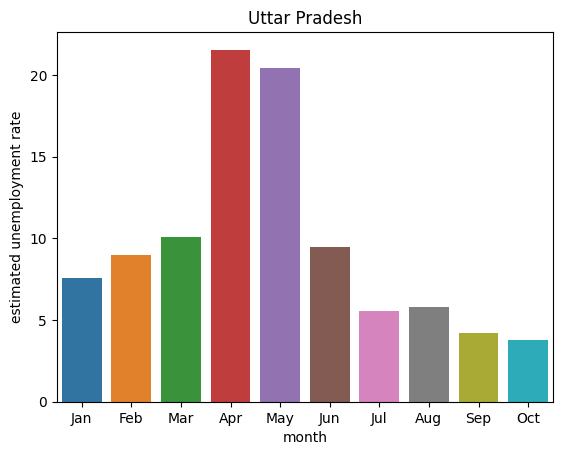

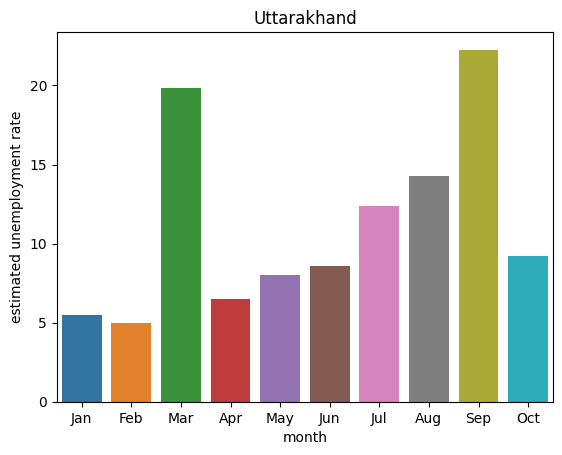

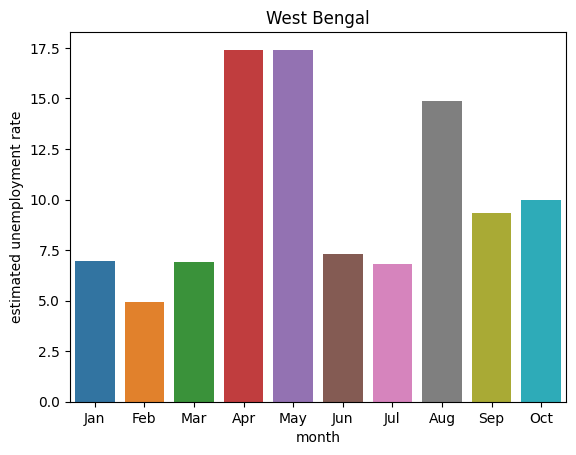

In [21]:
for state in df['state'].unique():
    dff = df.copy()
    dff = dff[dff['state'] == state]
    sns.barplot(x='month',y='estimated unemployment rate',data = dff)
    plt.title(state)
    plt.show()

In [22]:
#Region wise Analysis

region = df.groupby(["region"])[["estimated unemployment rate", "estimated employed",
                               "estimated labour participation rate"]].mean()
region = region.sort_values(by= "estimated unemployment rate",ascending=False)
region = pd.DataFrame(region).reset_index()
region.head()

,region,estimated unemployment rate,estimated employed,estimated labour participation rate
0,North,15.889620,1.307249e+07,38.702658
1,East,13.916000,1.960237e+07,40.108750
2,Northeast,10.950263,3.617106e+06,52.055263
3,South,10.454667,1.404059e+07,40.436167
4,West,8.239000,1.862351e+07,41.257000


In [23]:
# Average Unemployment Rate

fig = px.bar(region, x="region", y="estimated unemployment rate", color="region", title="Average Unemployment Rate (Region)")
fig.show()


Text(0.5, 1.0, 'estimated unemployment rate in different regions')

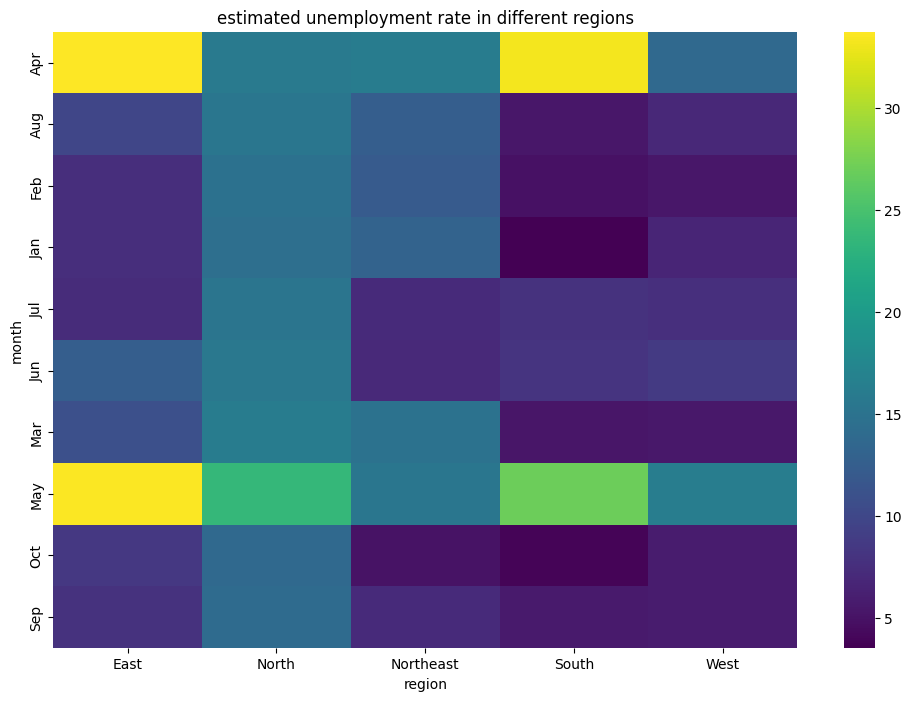

In [24]:
fig = plt.figure(figsize = (12,8))
sns.heatmap(df.pivot_table(values='estimated unemployment rate',index='month',columns='region'),cmap='viridis')
plt.title('estimated unemployment rate in different regions')

Text(0.5, 1.0, 'estimated unemployment rate in different regions')

<Figure size 1200x800 with 0 Axes>

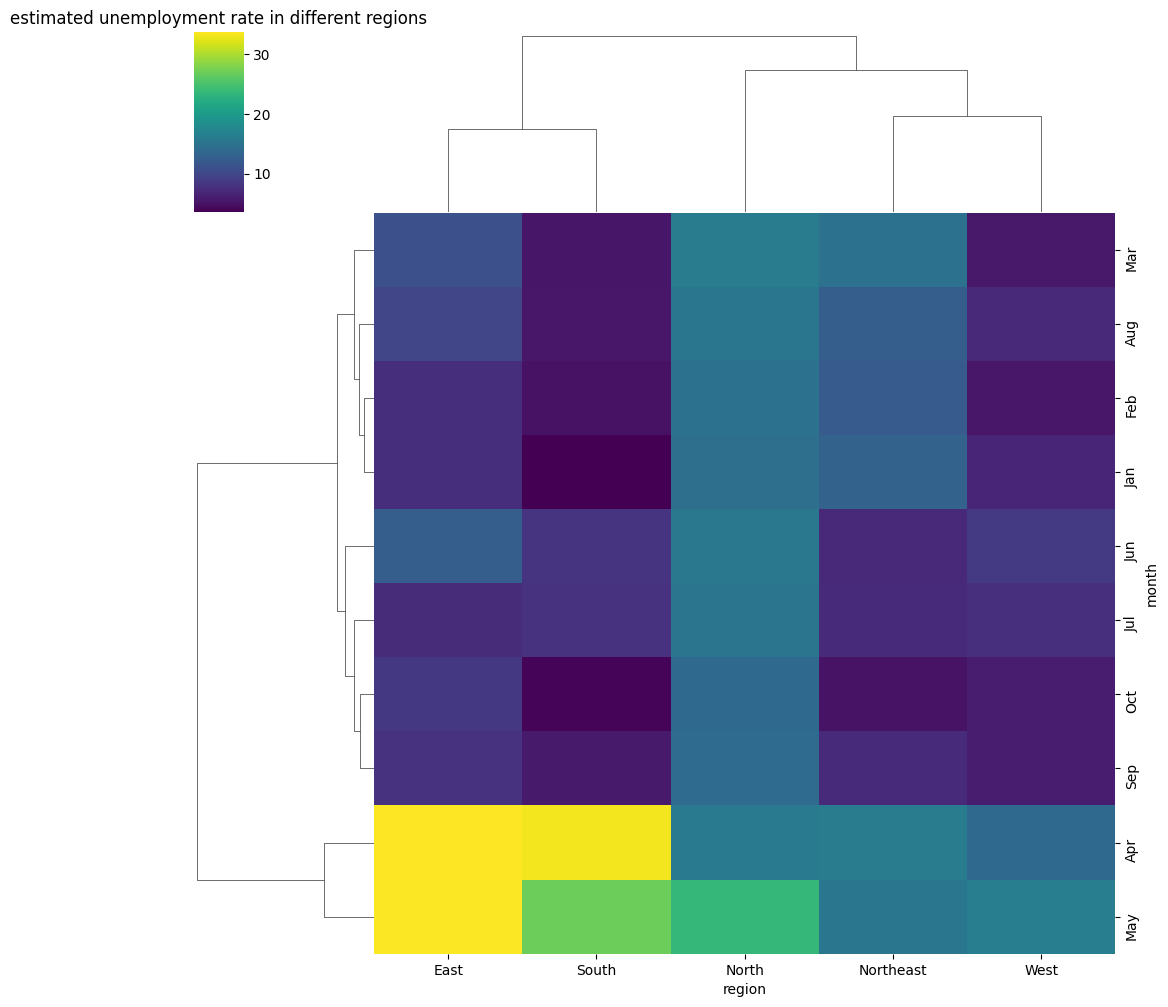

In [25]:
fig = plt.figure(figsize = (12,8))
sns.clustermap(df.pivot_table(values='estimated unemployment rate',index='month',columns='region').fillna(12.23),cmap='viridis')
plt.title('estimated unemployment rate in different regions')

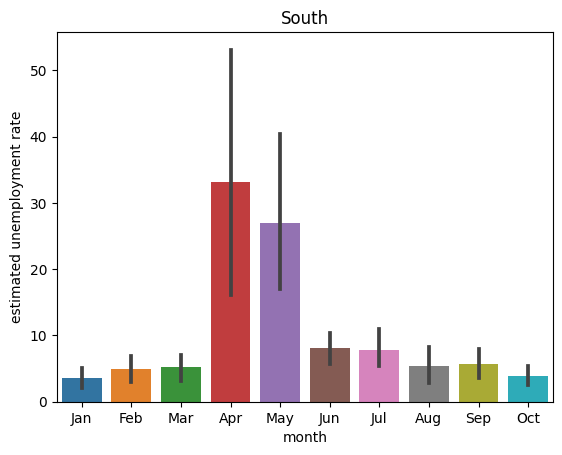

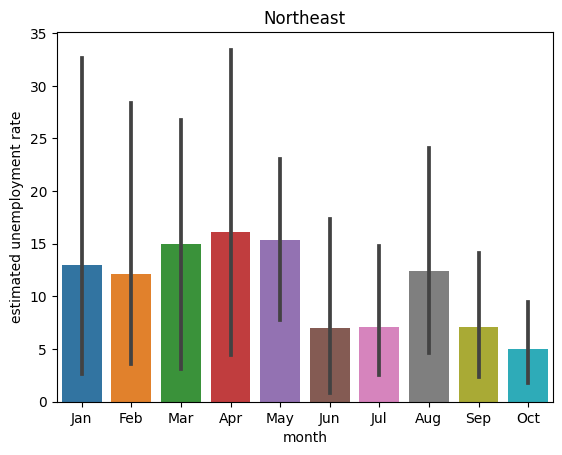

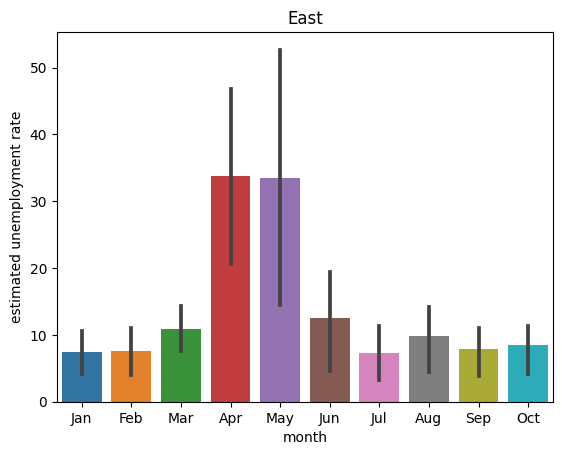

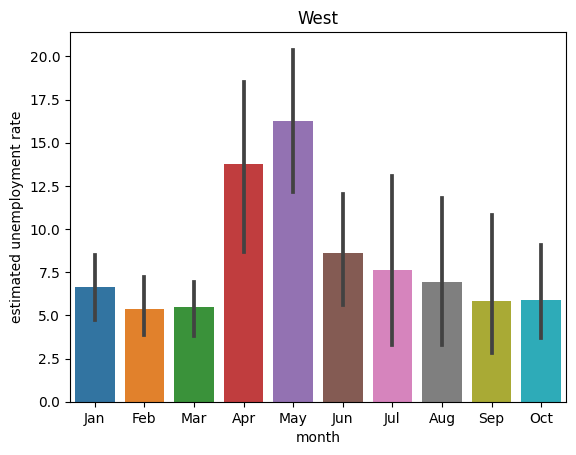

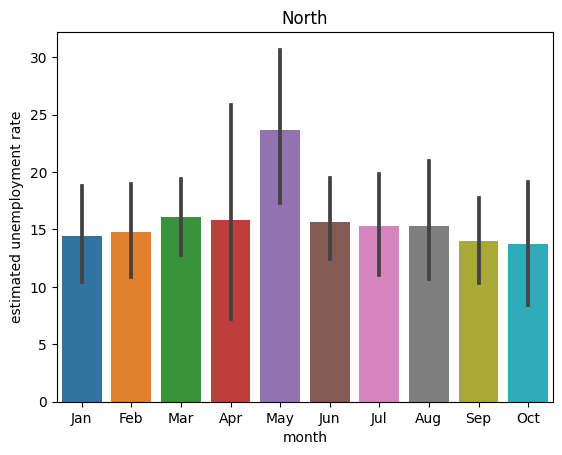

In [26]:
#unemployment rates in different regions with the different months
for region in df['region'].unique():
    dff = df.copy()
    dff = dff[dff['region'] == region]
    sns.barplot(x='month',y='estimated unemployment rate',data = dff)
    plt.title(region)
    plt.show()

In [27]:
fig = px.box(df,x='region',y='estimated unemployment rate',color='region',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:


\\\|||||||||||||||||||||||||||\\\\\\\\\\\








